In [1]:
import numpy as np

## Simulation nº1

Fix $\epsilon = 0.05$, $p(x) \sim \mathcal{N}(0,1)$ and generate $n$ samples from the following data generative process:
$
\begin{align}
    x &\sim p(x)\\ 
    b &\sim \mathcal{U}(\{-1, 1\})\\
    y | x, b &\sim \mathcal{N}(bx, \epsilon^2) \\
\end{align}$

From now on, all distributions are defined conditionally on $x$.

### Simulation nº1 with VE-SDE

The diffusion process for $y_t$ defined by the VE-SDE is:
$ \left\{ \begin{array}{l}
    d y_t = \sqrt{ \frac{d [\sigma(t)^2]}{dt} } dW_t \\
    y_0 = y_0 
    \end{array}\right. \\
     $, which implies the distribution of $y_t$ is: $ p(y_t | y_0) = \mathcal{N}(y_0, \sigma(t)^2) $.

So we have:
- $p_t(y_t | y_0) = \mathcal{N}(y_0, \sigma(t)^2)$
- $p(y_0 | x, b) = \mathcal{N}(bx, \epsilon^2)$
- $p(b) = \mathcal{U}(\{-1, 1\})$

Hence $$p_t(y_t | x) = \frac{1}{2} \sum_{b \in \{-1, 1\}} \mathcal{N}(y; bx, \epsilon^2 + \sigma(t)^2).$$


The score function is:
\begin{align}
  \nabla_y \log p_t(y | x) &= \frac{\nabla_y p_t(y | x)}{p_t(y | x)} \\
  &= 
  \frac{
    \sum_{b \in \{-1, 1\}} 
      \exp( - \frac{1}{2} \frac{(y - bx)^2}{\epsilon^2 + \sigma(t)^2}) 
      \cdot - \frac{y - bx}{\epsilon^2 + \sigma(t)^2} 
    }{ 
      \sum_{b \in \{-1, 1\}} \exp( - \frac{1}{2} \frac{(y - bx)^2}{\epsilon^2 + \sigma(t)^2}) 
    } \\
  &= \frac{-1}{\epsilon^2 + \sigma(t)^2} \left(
    y - x \frac{
        \sum_{b \in \{-1, 1\}} b\exp( - \frac{1}{2}\frac{(y - bx)^2}{\epsilon^2 + \sigma(t)^2})
      }{
        \sum_{b \in \{-1, 1\}} \exp( - \frac{1}{2}\frac{(y - bx)^2}{\epsilon^2 + \sigma(t)^2}) 
      }
    \right)
\end{align}

We can further simplify this since $[\exp(a) - \exp(b) ] / [\exp(a) + \exp(b)] = \tanh((a - b)/2)$, and we have:
\begin{align}
  \nabla_y \log p_t(y | x) &= \frac{-1}{\epsilon^2 + \sigma(t)^2} \left(
    y - x \tanh\left(\frac{4xy}{\epsilon^2 + \sigma(t)^2}\right)
    \right)
\end{align}


In [2]:
n = 1000
X_train1 = np.random.rand(n, 1)
y_train1 = X_train1 + np.random.randn(n, 1) * 0.05

X_train2 = np.random.rand(n, 1)
y_train2 = -X_train2 + np.random.randn(n, 1) * 0.05


X_train = np.concatenate([X_train1, X_train2], axis=0)
y_train = np.concatenate([y_train1, y_train2], axis=0)

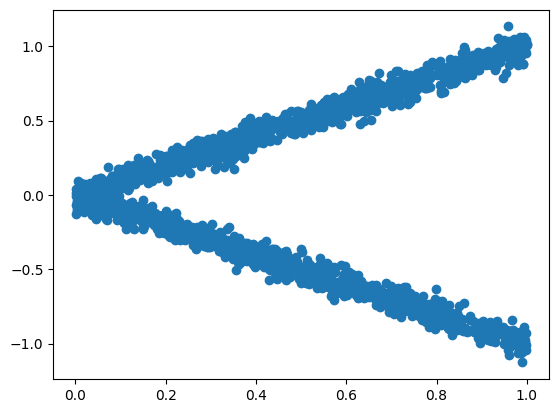

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)

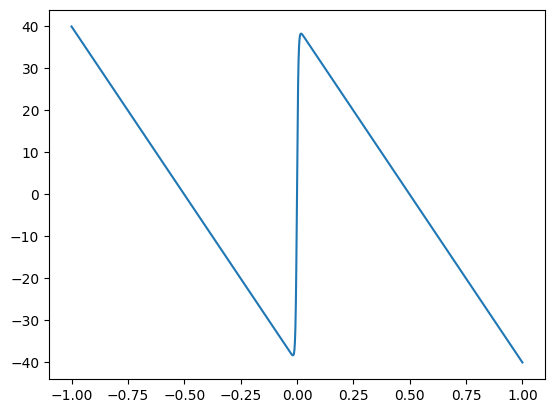

In [30]:
def score_function(y, x, sigma):
    return -1 / (0.05**2 + sigma**2) * (y - x * np.tanh(4 * x * y / (0.05**2 + sigma**2)))

x = 0.5
t = 0.1
sigma_min = 0.01
sigma_max = 0.02
sigma = sigma_min * (sigma_max / sigma_min)**t
y = np.linspace(-1, 1, 1000)
plt.plot(y, score_function(y, x, 0.1), label=f"x={x}")
plt.show()